In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [57]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [58]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-18.534260500035415, -142.2490654380834),
 (58.50226539345303, -36.00425442654654),
 (-51.7260150335352, -83.59202863991611),
 (-37.30818883686088, 30.84472511829125),
 (29.591312781943017, -160.97388810679843),
 (27.18478551758747, -137.56847438795907),
 (53.25259109410521, -131.55034976250624),
 (76.2292566274744, -138.89507157131823),
 (82.42820905763512, 0.2656250127445503),
 (-32.731626648833185, 55.88459637111518),
 (71.53656280946109, 106.39800561395077),
 (-82.52149456827328, 17.60068427856038),
 (-68.21569610563692, -42.16312577429474),
 (-88.99657626644822, 64.46382458631828),
 (-48.56062729972441, 80.9050455689852),
 (-62.422558262033064, 66.26438837432289),
 (-57.35816508310889, 42.788818319214215),
 (-84.8382020491544, -91.60486564115547),
 (22.975038249716206, -63.66101930611286),
 (62.33441390409098, -158.2159516218612),
 (-0.8231692289589034, -157.69842152543114),
 (-35.65368249278696, -150.75033855830708),
 (7.39226191456622, -140.4660748177037),
 (-32.56605063077179

In [59]:
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
 #   print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
 #         citipy.nearest_city(coordinate[0], coordinate[1]).country_code)
    

In [60]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [61]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#city_url = url + "&q=" + "Boston"
#city_weather = requests.get(city_url)

In [62]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Begining of Data Retrivel")
print("-------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
                            

Begining of Data Retrivel
-------------------------
Processing Record 1 of Set 1 | tautira
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | pacific grove
Processing Record 7 of Set 1 | prince rupert
Processing Record 8 of Set 1 | aklavik
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | saint-joseph
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | road town
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of S

Processing Record 38 of Set 4 | chunhuhub
Processing Record 39 of Set 4 | pangai
Processing Record 40 of Set 4 | villa rica
Processing Record 41 of Set 4 | ancud
Processing Record 42 of Set 4 | shingu
Processing Record 43 of Set 4 | guanica
Processing Record 44 of Set 4 | jumla
Processing Record 45 of Set 4 | avdon
Processing Record 46 of Set 4 | hermanus
Processing Record 47 of Set 4 | yerbogachen
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 50 of Set 4 | port lincoln
Processing Record 1 of Set 5 | bud
Processing Record 2 of Set 5 | birjand
Processing Record 3 of Set 5 | yarega
Processing Record 4 of Set 5 | tuktoyaktuk
Processing Record 5 of Set 5 | kavaratti
Processing Record 6 of Set 5 | nalut
Processing Record 7 of Set 5 | senno
Processing Record 8 of Set 5 | husavik
Processing Record 9 of Set 5 | calabozo
Processing Record 10 of Set 5 | elizabethton
Processing Record 11 of Set 5 | souillac
Processing Record 12 of Set 5 | pa

Processing Record 25 of Set 8 | kunzelsau
Processing Record 26 of Set 8 | dondo
Processing Record 27 of Set 8 | provideniya
Processing Record 28 of Set 8 | ambalavao
Processing Record 29 of Set 8 | north branch
Processing Record 30 of Set 8 | neiafu
Processing Record 31 of Set 8 | zaozerne
Processing Record 32 of Set 8 | kavieng
Processing Record 33 of Set 8 | college
Processing Record 34 of Set 8 | romitan
Processing Record 35 of Set 8 | dryden
Processing Record 36 of Set 8 | kloulklubed
Processing Record 37 of Set 8 | voyvozh
Processing Record 38 of Set 8 | noshiro
Processing Record 39 of Set 8 | dubbo
Processing Record 40 of Set 8 | aksarka
Processing Record 41 of Set 8 | quatre cocos
Processing Record 42 of Set 8 | vangaindrano
Processing Record 43 of Set 8 | nizhnevartovsk
Processing Record 44 of Set 8 | sao jose da coroa grande
Processing Record 45 of Set 8 | kato mazarakion
Processing Record 46 of Set 8 | houma
Processing Record 47 of Set 8 | graham
Processing Record 48 of Set 8

Processing Record 17 of Set 12 | monte azul
Processing Record 18 of Set 12 | bastia
Processing Record 19 of Set 12 | pauini
Processing Record 20 of Set 12 | calhoun
Processing Record 21 of Set 12 | usinsk
Processing Record 22 of Set 12 | tecpan
Processing Record 23 of Set 12 | avera
Processing Record 24 of Set 12 | kourou
Processing Record 25 of Set 12 | dolinsk
Processing Record 26 of Set 12 | ponta do sol
Processing Record 27 of Set 12 | rocha
Processing Record 28 of Set 12 | tamandare
Processing Record 29 of Set 12 | gat
Processing Record 30 of Set 12 | bumba
Processing Record 31 of Set 12 | zhezkazgan
Processing Record 32 of Set 12 | fare
Processing Record 33 of Set 12 | dharmavaram
Processing Record 34 of Set 12 | ponta delgada
Processing Record 35 of Set 12 | mao
Processing Record 36 of Set 12 | hollins
Processing Record 37 of Set 12 | olindina
Processing Record 38 of Set 12 | vila franca do campo
Processing Record 39 of Set 12 | ambilobe
Processing Record 40 of Set 12 | kirakira

In [63]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tautira,-17.73,-149.15,80.60,65,75,8.05,PF,2020-08-20 00:13:20
1,Tasiilaq,65.61,-37.64,44.60,75,0,12.75,GL,2020-08-20 00:13:20
2,Punta Arenas,-53.15,-70.92,44.60,75,83,26.40,CL,2020-08-20 00:13:20
3,East London,-33.02,27.91,52.74,56,5,5.73,ZA,2020-08-20 00:13:20
4,Kapaa,22.08,-159.32,84.20,66,1,14.99,US,2020-08-20 00:13:21
5,Pacific Grove,36.62,-121.92,77.00,41,90,4.70,US,2020-08-20 00:13:21
6,Prince Rupert,54.32,-130.32,57.20,100,90,2.24,CA,2020-08-20 00:12:13
7,Aklavik,68.22,-135.01,60.80,72,40,3.36,CA,2020-08-20 00:13:21
8,Saint-Joseph,-21.37,55.62,69.01,68,90,3.36,RE,2020-08-20 00:13:22
9,Khatanga,71.97,102.50,52.27,60,55,10.29,RU,2020-08-20 00:13:22


In [64]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tautira,PF,2020-08-20 00:13:20,-17.73,-149.15,80.60,65,75,8.05
1,Tasiilaq,GL,2020-08-20 00:13:20,65.61,-37.64,44.60,75,0,12.75
2,Punta Arenas,CL,2020-08-20 00:13:20,-53.15,-70.92,44.60,75,83,26.40
3,East London,ZA,2020-08-20 00:13:20,-33.02,27.91,52.74,56,5,5.73
4,Kapaa,US,2020-08-20 00:13:21,22.08,-159.32,84.20,66,1,14.99
5,Pacific Grove,US,2020-08-20 00:13:21,36.62,-121.92,77.00,41,90,4.70
6,Prince Rupert,CA,2020-08-20 00:12:13,54.32,-130.32,57.20,100,90,2.24
7,Aklavik,CA,2020-08-20 00:13:21,68.22,-135.01,60.80,72,40,3.36
8,Saint-Joseph,RE,2020-08-20 00:13:22,-21.37,55.62,69.01,68,90,3.36
9,Khatanga,RU,2020-08-20 00:13:22,71.97,102.50,52.27,60,55,10.29


In [65]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [66]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
#print(lats)
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [67]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1597882542.9587505

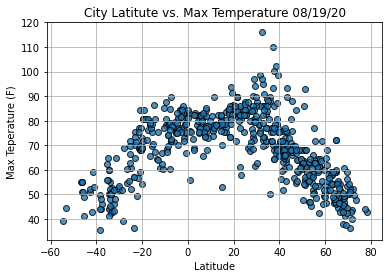

In [68]:
#imports
%matplotlib inline
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
           max_temps, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate other graph activities
plt.title(f"City Latitute vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Teperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

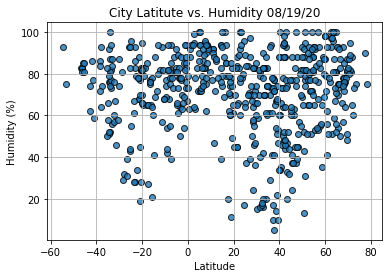

In [69]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, 
           humidity, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate other graph activities
plt.title(f"City Latitute vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

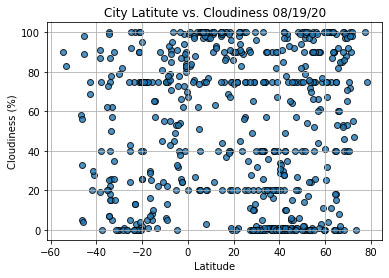

In [70]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, 
           cloudiness, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate other graph activities
plt.title(f"City Latitute vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

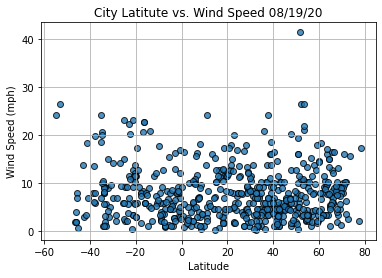

In [71]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, 
           wind_speed, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate other graph activities
plt.title(f"City Latitute vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()

In [106]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

from scipy.stats import linregress
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


In [79]:
index13 = city_data_df.loc[13]
index13

City                    Road Town
Country                        VG
Date          2020-08-20 00:09:56
Lat                         18.42
Lng                        -64.62
Max Temp                     84.2
Humidity                       74
Cloudiness                     40
Wind Speed                  11.41
Name: 13, dtype: object

In [80]:
city_data_df["Lat"]>= 0

0      False
1       True
2      False
3      False
4       True
       ...  
581     True
582     True
583     True
584     True
585    False
Name: Lat, Length: 586, dtype: bool

In [81]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [82]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Tasiilaq,GL,2020-08-20 00:13:20,65.61,-37.64,44.6,75,0,12.75
4,Kapaa,US,2020-08-20 00:13:21,22.08,-159.32,84.2,66,1,14.99
5,Pacific Grove,US,2020-08-20 00:13:21,36.62,-121.92,77.0,41,90,4.70
6,Prince Rupert,CA,2020-08-20 00:12:13,54.32,-130.32,57.2,100,90,2.24
7,Aklavik,CA,2020-08-20 00:13:21,68.22,-135.01,60.8,72,40,3.36


In [77]:
# southern_hemi_df.head()

In [113]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                       for Maximum Temperature', 'Max Temp',(10,40))

SyntaxError: EOL while scanning string literal (<ipython-input-113-977cc754848a>, line 6)

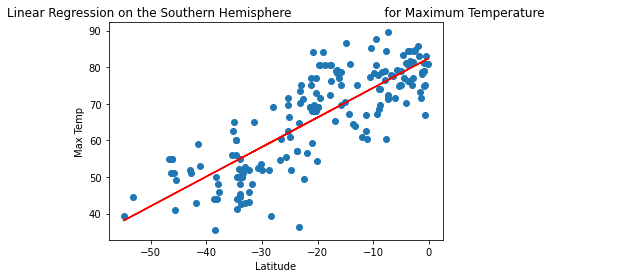

In [117]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 
                       'Max Temp',(10,40))

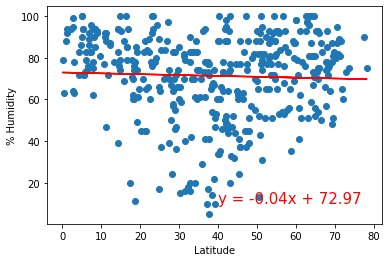

In [93]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

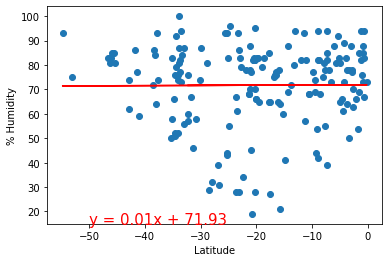

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

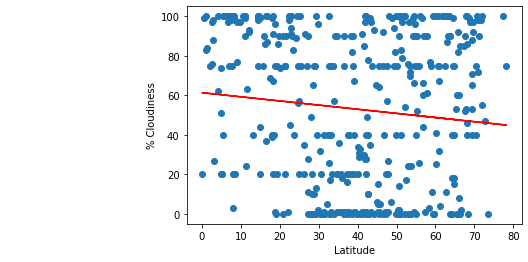

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,15))

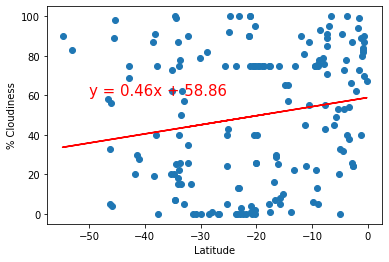

In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

SyntaxError: EOL while scanning string literal (<ipython-input-98-7024af74f12d>, line 6)

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))